In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

In [ ]:
# tmp = df[ (df["model"]=="amarok") ]
# tmp[ tmp['mileage'] < 2_000_000 ]

# df[ (df["model"]=="amarok") & (df['mileage'] >= 1_000_000) ]

In [ ]:
df.head()

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12692 entries, 0 to 12691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12692 non-null  int64  
 1   mark             12692 non-null  object 
 2   model            12692 non-null  object 
 3   generation_name  10575 non-null  object 
 4   year             12691 non-null  float64
 5   mileage          12691 non-null  float64
 6   vol_engine       12691 non-null  float64
 7   fuel             12691 non-null  object 
 8   city             12691 non-null  object 
 9   province         12691 non-null  object 
 10  price            12691 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In [8]:
for i in df.columns:
    if df[i].isnull().sum(axis=0) != 0:
        print(i, df[i].isnull().sum(axis=0))

generation_name 2117
year 1
mileage 1
vol_engine 1
fuel 1
city 1
province 1
price 1


In [9]:
df["generation_name"].reset_index()
df["generation_name"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12692 entries, 0 to 12691
Series name: generation_name
Non-Null Count  Dtype 
--------------  ----- 
10575 non-null  object
dtypes: object(1)
memory usage: 99.3+ KB


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head(0)

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price


In [11]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols = [], title=None):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')

    corr = df_temp.corr()

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    # sns.heatmap(corr, annot=True, cmap=cmap)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

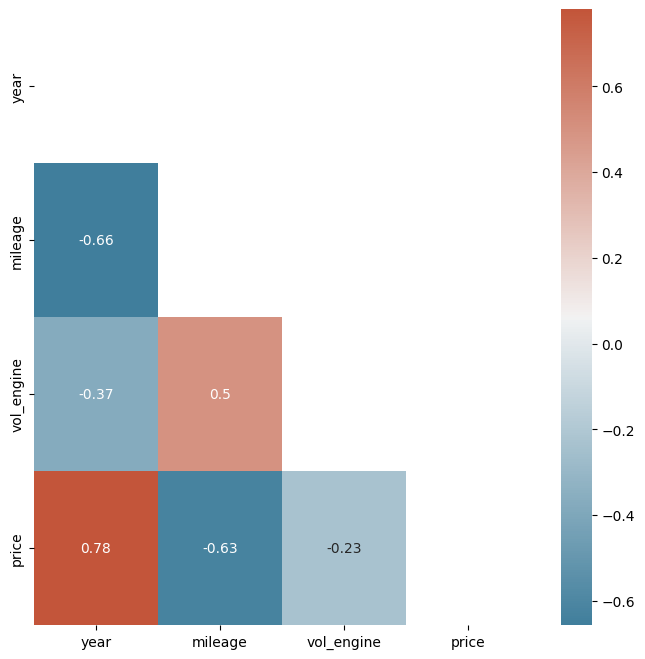

In [12]:
excl_cols = ["mark", "model", "generation_name", "fuel", "city", "province"]
get_heat_map_corr(df, figsize=(8, 8), remove_cols = excl_cols)

### add new column to have miles converted to kilometers

In [4]:
dataset_year = 2022
df['age'] = 2022-df['year']
df['miles_per_year'] = df['mileage'] / df['age']

df['miles_per_year'] = df['miles_per_year'].apply(lambda x: '{:.2f}'.format(x))
df['miles_per_year'] = df['miles_per_year'].astype(float)
df.columns

# rearange columns
df = df[
    [
        'mark',
        'model',
        'generation_name',
        'year',
        'age',
        'mileage',
        'miles_per_year',
        'vol_engine',
        'fuel',
        'city',
        'province',
        'price',
    ]
]
df.head(3)

,mark,model,generation_name,year,age,mileage,miles_per_year,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,7,139568,19938.29,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,4,31991,7997.75,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,7,278437,39776.71,1598,Diesel,Brzeg,Opolskie,27000


In [5]:
df["mileage"].reset_index()
df["kilometers"] = df["mileage"] * 1.609344

df["kilometers_per_year"] = df["miles_per_year"] * 1.609344

# fortmat to 2 digits after .
df['kilometers'] = df['kilometers'].apply(lambda x: '{:.2f}'.format(x))
df['kilometers'] = df['kilometers'].astype(float)

df['kilometers_per_year'] = df['kilometers_per_year'].apply(lambda x: '{:.2f}'.format(x))
df['kilometers_per_year'] = df['kilometers_per_year'].astype(float)

# rearange columns
df.columns
df = df[['mark', 'model', 'generation_name', 'year', 'age', 'mileage', 'miles_per_year', 'kilometers', 'kilometers_per_year', 'vol_engine', 'fuel', 'city', 'province', 'price']]


### get car with biggest milage

In [6]:
mileage = df.sort_values(by=['mileage'],ascending=False)
mileage[["mark", "model", "year", "age", "mileage", "miles_per_year", 'kilometers_per_year', 'kilometers', 'price']].head(15)

# # df['mileage'].max()
# idx = df['mileage'].idxmax()
# df.loc[idx].reset_index()

,mark,model,year,age,mileage,miles_per_year,kilometers_per_year,kilometers,price
55214,ford,tourneo-connect,2008,14,2800000,200000.00,321868.80,4506163.20,12300
53958,ford,mondeo,2014,8,2500000,312500.00,502920.00,4023360.00,23800
35046,volkswagen,amarok,2021,1,1000000,1000000.00,1609344.00,1609344.00,110085
38562,volkswagen,golf,2018,4,1000000,250000.00,402336.00,1609344.00,400000
26783,bmw,seria-3,2005,17,999999,58823.47,94667.20,1609342.39,9300
54223,ford,mustang,1967,55,999999,18181.80,29260.77,1609342.39,35000
62535,mercedes-benz,vito,2017,5,900000,180000.00,289681.92,1448409.60,67650
45461,volkswagen,transporter,1998,24,755350,31472.92,50650.75,1215617.99,9900
81536,chevrolet,aveo,2009,13,730000,56153.85,90370.86,1174821.12,7000
55297,ford,tourneo-custom,2013,9,722284,80253.78,129155.94,1162403.42,47355


<BarContainer object of 12692 artists>

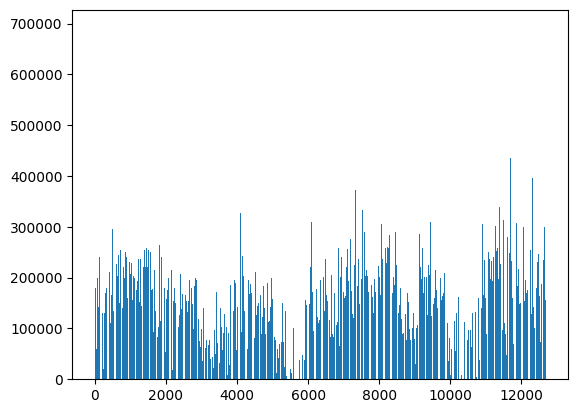

In [25]:
# plt.scatter(df["mileage"].index,df["mileage"])
plt.bar(df["mileage"].index,df["mileage"])

<BarContainer object of 12692 artists>

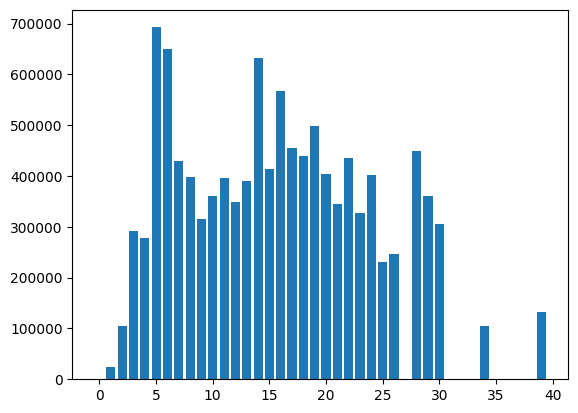

In [22]:
# plt.scatter(df["age"], df['mileage'])


x = df["mileage"][:1000]
y = df['age'][:1000]
# plt.scatter(x,y)
plt.bar(df["age"], df['mileage'])

### get best and worst selling car manufacturer

In [7]:
df['mark'].value_counts().reset_index()
# df['mark'].value_counts().idxmax()

print("top most sold:")
print(df['mark'].value_counts().head(4))

print()
print("top least sold:")
print(df['mark'].value_counts().tail(4))


top most sold:
mark
audi          12031
opel          11914
bmw           11070
volkswagen    10848
Name: count, dtype: int64

top least sold:
mark
mitsubishi    1120
mini          1088
alfa-romeo     704
chevrolet      608
Name: count, dtype: int64


### printed best and worst selling models for every car manufacturer

In [8]:
mnufacturers_df = df.groupby('mark')

# mnufacturers_df = mnufacturers_df.sort_values(ascending=False)
mnufacturers_df.value_counts().reset_index()

mnufacturers_lst = df['mark'].unique().tolist()
# mnufacturers_df.get_group('bmw')["model"].value_counts()

mnufacturers_dict = {}

for i in mnufacturers_lst:
    top_model = mnufacturers_df.get_group(i)["model"].value_counts().head(3)
    bottom_model = mnufacturers_df.get_group(i)["model"].value_counts().tail(3)
    print()
    # # print(top_model.index[0])
    # # print(top_model.values[0])

    print(f"model most sold of manufacturer  '{i}': '{top_model.index[0]}' \n{top_model.values[0]} units sold ")
    print(f"model least sold of manufacturer '{i}': '{bottom_model.index[0]}' \n{bottom_model.values[0]} units sold ")

    mnufacturers_dict[i] = [
        # [top_model.index[i] for i in range(len(top_model.index))]
        top_model.index[0],
        top_model.index[1],
        top_model.index[2],
    ]



model most sold of manufacturer  'opel': 'astra' 
3331 units sold 
model least sold of manufacturer 'opel': 'omega' 
20 units sold 

model most sold of manufacturer  'audi': 'a4' 
2912 units sold 
model least sold of manufacturer 'audi': 'rs-q3' 
32 units sold 

model most sold of manufacturer  'bmw': 'seria-3' 
2944 units sold 
model least sold of manufacturer 'bmw': 'm4' 
32 units sold 

model most sold of manufacturer  'volkswagen': 'golf' 
2592 units sold 
model least sold of manufacturer 'volkswagen': 'lupo' 
32 units sold 

model most sold of manufacturer  'ford': 'focus' 
2144 units sold 
model least sold of manufacturer 'ford': 'tourneo-connect' 
32 units sold 

model most sold of manufacturer  'mercedes-benz': 'c-klasa' 
1472 units sold 
model least sold of manufacturer 'mercedes-benz': 'slk-klasa' 
32 units sold 

model most sold of manufacturer  'renault': 'megane' 
1568 units sold 
model least sold of manufacturer 'renault': 'zoe' 
64 units sold 

model most sold of manufa

In [9]:
top_seller_cars=pd.DataFrame(mnufacturers_dict)
top_seller_cars

,opel,audi,bmw,volkswagen,ford,mercedes-benz,renault,toyota,skoda,alfa-romeo,...,honda,hyundai,kia,mazda,mini,mitsubishi,nissan,peugeot,seat,volvo
0,astra,a4,seria-3,golf,focus,c-klasa,megane,yaris,octavia,159,...,civic,i30,sportage,6,cooper,asx,qashqai,308,leon,xc-90
1,insignia,a6,seria-5,passat,mondeo,e-klasa,clio,auris,fabia,giulia,...,cr-v,ix35,ceed,3,countryman,outlander,juke,508,ibiza,xc-60
2,corsa,a3,seria-1,polo,fiesta,a-klasa,scenic,avensis,superb,giulietta,...,accord,tucson,venga,cx-5,cooper-s,colt,micra,3008,altea,s60


### printed best selling manufacturer for each city

In [10]:
# most_sold_car_by_city = df.groupby('city').value_counts()
# most_sold_car_by_city.reset_index()

most_sold_car_by_city = df.groupby('city')['mark'].value_counts().groupby(level=0).idxmax()
most_sold_car_by_city.reset_index()

,city,count
0,(),"((), toyota)"
1,Adamowizna,"(Adamowizna, skoda)"
2,Adamowo,"(Adamowo, audi)"
3,Adamusy,"(Adamusy, bmw)"
4,Adamów,"(Adamów, citroen)"
...,...,...
4422,Żywocice,"(Żywocice, opel)"
4423,Żórawina,"(Żórawina, bmw)"
4424,Żółwin,"(Żółwin, opel)"
4425,Żędowice,"(Żędowice, volkswagen)"


### printed most common 'model' and 'generation_name' for eaech car manufacturer

In [11]:
most_sold_car = df.groupby('mark')[['model','generation_name',]].value_counts().groupby(level=0).idxmax()

data = []
for i in most_sold_car:
    # print(i[0:])
    data.append([
            i[0],
            i[1],
            i[2],
        ])

pd.DataFrame(data, columns=['mark', 'model', 'generation_name'])
# data
# most_sold_car.reset_index()

,mark,model,generation_name
0,audi,a3,gen-8p-2003-2012
1,bmw,seria-3,gen-e90-2005-2012
2,citroen,c5,gen-iii-2008
3,fiat,tipo,gen-ii-2016
4,ford,focus,gen-mk3-2010
5,honda,civic,gen-viii-2006-2011
6,hyundai,i30,gen-iii-2017
7,kia,sportage,gen-iii-2010-2015
8,mazda,6,gen-iii-2012-6
9,mercedes-benz,e-klasa,gen-w213-2016


In [12]:
most_sold_car = df.groupby('mark')[['model','fuel',]].value_counts().groupby(level=0).idxmax()

data = []
for i in most_sold_car:
    # print(i[0:])
    data.append([
            i[0],
            i[1],
            i[2],
        ])

pd.DataFrame(data, columns=['mark', 'model', 'fuel'])
# data
# most_sold_car.reset_index()

,mark,model,fuel
0,alfa-romeo,giulia,Gasoline
1,audi,a6,Diesel
2,bmw,seria-5,Diesel
3,chevrolet,aveo,Gasoline
4,citroen,c5,Diesel
5,fiat,tipo,Gasoline
6,ford,mondeo,Diesel
7,honda,civic,Gasoline
8,hyundai,i30,Gasoline
9,kia,sportage,Gasoline


### top most used fuel

In [13]:
df["fuel"].value_counts().reset_index()

,fuel,count
0,Gasoline,61597
1,Diesel,48476
2,LPG,4301
3,Hybrid,2621
4,Electric,885
5,CNG,47


In [14]:
df["vol_engine"].value_counts().reset_index()
min_eng_vol = df["vol_engine"].min()

# df[ df["vol_engine"] == min_eng_vol ]
tmp = df[ (df["vol_engine"] == min_eng_vol) & (df['fuel'] != 'Electric') ]
# tmp['year'].describe()
tmp

,mark,model,generation_name,year,age,mileage,miles_per_year,kilometers,kilometers_per_year,vol_engine,fuel,city,province,price
3202,opel,astra,gen-k-2015,2021,1,0,0.0,0.0,0.0,0,Diesel,Katowice,Śląskie,91600
3248,opel,astra,gen-k-2015,2021,1,0,0.0,0.0,0.0,0,Diesel,Katowice,Śląskie,100000
5496,opel,corsa,gen-f-2019,2021,1,0,0.0,0.0,0.0,0,Gasoline,Katowice,Śląskie,75890
5498,opel,corsa,gen-f-2019,2021,1,0,0.0,0.0,0.0,0,Gasoline,Katowice,Śląskie,76790
5699,opel,crossland-x,NaN,2021,1,0,0.0,0.0,0.0,0,Gasoline,Chorzów,Śląskie,80968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111456,seat,ateca,NaN,2022,0,0,NaN,0.0,NaN,0,Gasoline,Wrocław,Dolnośląskie,129055
111457,seat,ateca,NaN,2022,0,0,NaN,0.0,NaN,0,Gasoline,Wrocław,Dolnośląskie,129055
111458,seat,ateca,NaN,2022,0,0,NaN,0.0,NaN,0,Gasoline,Wrocław,Dolnośląskie,143314
113303,seat,leon,gen-seat-leon-iv,2021,1,0,0.0,0.0,0.0,0,Gasoline,Wrocław,Dolnośląskie,102085
